# Data Science Job Market Analysis & Salary Prediction

In this project, I analyze a dataset of data-related jobs.  
Columns include:

- work_year  
- job_title  
- job_category  
- salary_currency  
- salary  
- salary_in_usd  
- employee_residence  
- experience_level  
- employment_type  
- work_setting  
- company_location  
- company_size  

Goals of this project:

1. Understand salary distribution in data jobs.
2. Compare salaries by:
   - experience level
   - job title
   - work setting (remote / hybrid / onsite)
   -  most important for salary.


In [75]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
import numpy as np
import seaborn as sns

In [91]:
df = pd.read_csv("../data/data_science_job.csv")
#inset the dataset.

In [93]:
df.head()
#it is showing first 5 rows. 

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


In [47]:
df.columns
#it check all columns.

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [157]:
df['salary_in_usd']

0       136086
1        67982
2       153309
3       135242
4        35156
         ...  
4995    179111
4996    196373
4997     51366
4998    181817
4999    172425
Name: salary_in_usd, Length: 5000, dtype: int64

In [45]:
df.info()
#show basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [43]:
df.describe()
#summary statistics

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [41]:
df.isnull().sum()
# Check for missing values

work_year               0
job_title               0
job_category          500
salary_currency       500
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64

In [51]:
df['job_title'].unique()[:20]
#show unigue job 

array(['Machine Learning Engineer  in office', 'Statistician  (Remote)',
       'Machine Learning Engineer  ', 'Data Analyst  in office',
       'Statistician  ', 'Data Scientist  (Remote)', 'Data Analyst  ',
       'Data Engineer  in office', 'Data Scientist  ',
       'Machine Learning Engineer  (Remote)', 'Data Engineer  ',
       'Data Engineer  (Remote)', 'Data Scientist  in office',
       'Data Analyst  (Remote)', 'Statistician  in office'], dtype=object)

In [105]:
#check dublicate
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate rows: 0


In [97]:
#Keep only rows with valid salary
df = df.dropna(subset=["salary_in_usd"])
df = df[df["salary_in_usd"] > 0]

In [123]:
# remove extreme top 1% salaries
q99 = df["salary_in_usd"].quantile(0.99)
df_plot = df[df["salary_in_usd"] < q99]

## Exploratory Data Analysis (EDA)

In [53]:
#show experience level
df['experience_level'].value_counts()

experience_level
SE    1154
EX    1119
EN    1115
MI    1112
Name: count, dtype: int64

In [108]:
df["salary_in_usd"].describe()

count      5000.000000
mean     114076.995800
std       49113.807687
min       30016.000000
25%       71343.750000
50%      114167.000000
75%      156665.750000
max      199985.000000
Name: salary_in_usd, dtype: float64

### Salary distribution

In [147]:
df["salary_in_usd"].describe()
df["salary_in_usd"].value_counts().head(10)

salary_in_usd
117157    2
38048     2
63208     2
174603    2
60158     2
40047     2
127491    2
34902     2
60796     2
179637    2
Name: count, dtype: int64

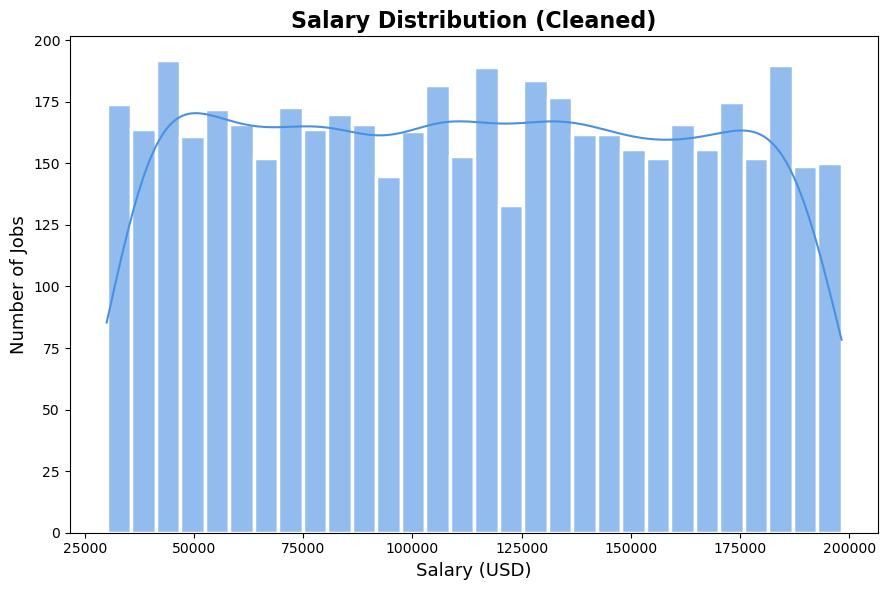

In [210]:
plt.figure(figsize=(9,6))

sns.histplot(
    df_plot["salary_in_usd"],
    bins=30,
    kde=True,
    color="#4A90E2",
    alpha=0.6,
    edgecolor="white",
    linewidth=2.5
)

plt.title("Salary Distribution (Cleaned)", fontsize=16, weight='bold')
plt.xlabel("Salary (USD)", fontsize=13)
plt.ylabel("Number of Jobs", fontsize=13)

plt.tight_layout()

# save BEFORE show
plt.savefig("../outputs/hstplot1.png")

plt.show()


### salary boxplot

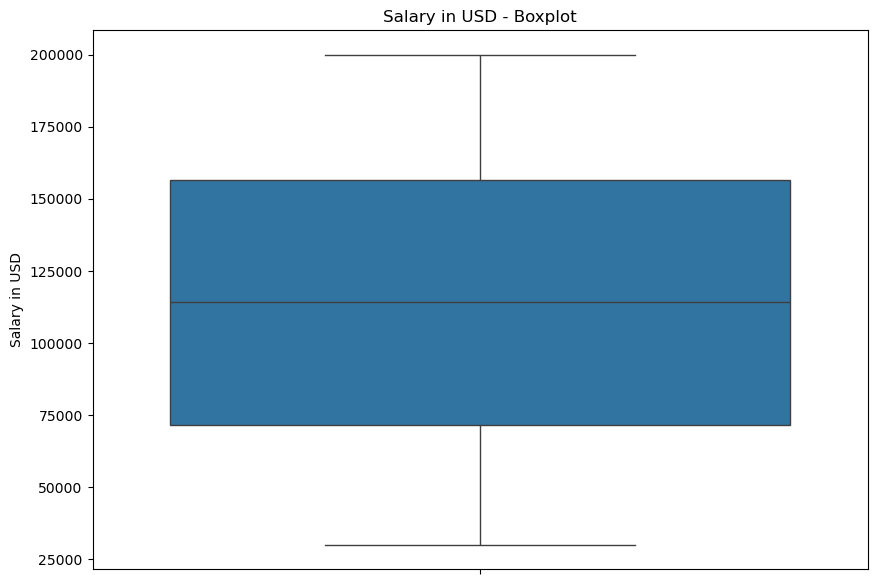

In [212]:
plt.figure(figsize=(10,7))
sns.boxplot(y=df["salary_in_usd"])
plt.title("Salary in USD - Boxplot")
plt.ylabel("Salary in USD")
plt.savefig("../outputs/salaty-in-usd-boxplot1.png")
plt.show()

### Jobs by experience level

In [160]:
df["experience_level"].value_counts()

experience_level
SE    1154
EX    1119
EN    1115
MI    1112
Name: count, dtype: int64

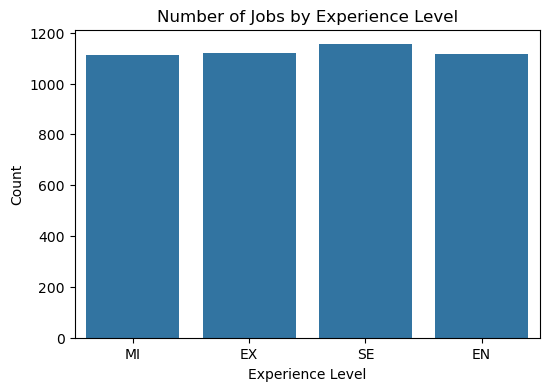

In [214]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="experience_level")
plt.title("Number of Jobs by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Count")

plt.savefig("../outputs/no_og_jobs-countplot1.png")

plt.show()

### Average salary by experience level

In [165]:
exp_salary = df.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending=False)
exp_salary

experience_level
EN    115287.299552
EX    113394.849866
MI    113389.446043
SE    112980.065858
Name: salary_in_usd, dtype: float64

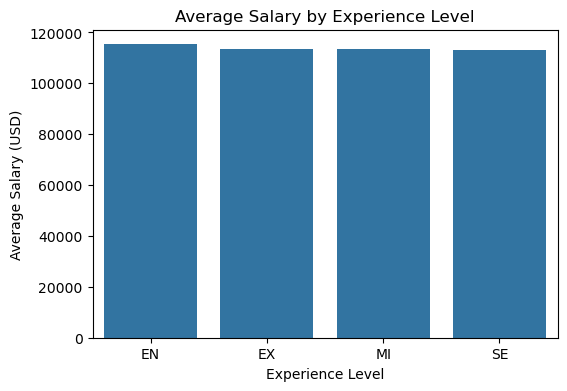

In [216]:
plt.figure(figsize=(6,4))
sns.barplot(x=exp_salary.index, y=exp_salary.values)
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")

plt.savefig("../outputs/average-salary-barplot1.png")

plt.show()

### Work setting (remote / hybrid / onsite)

In [170]:
df["work_setting"].value_counts()

work_setting
Hybrid       1721
In-person    1658
Remote       1621
Name: count, dtype: int64

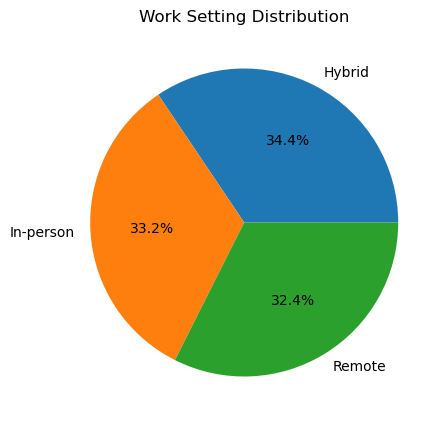

In [218]:
plt.figure(figsize=(5,5))
df["work_setting"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Work Setting Distribution")
plt.ylabel("")

plt.savefig("../outputs/work-setting-pie.png")

plt.show()


### Average salary by work setting

In [175]:
ws_salary = df.groupby("work_setting")["salary_in_usd"].mean().sort_values(ascending=False)
ws_salary

work_setting
In-person    115271.929433
Hybrid       113890.171412
Remote       113053.136952
Name: salary_in_usd, dtype: float64

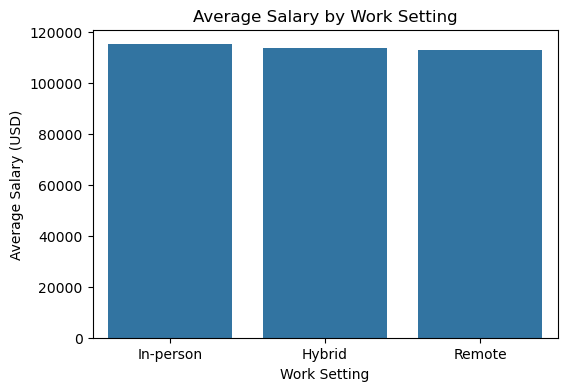

In [220]:
plt.figure(figsize=(6,4))
sns.barplot(x=ws_salary.index, y=ws_salary.values)
plt.title("Average Salary by Work Setting")
plt.xlabel("Work Setting")
plt.ylabel("Average Salary (USD)")

plt.savefig("../outputs/avg-salary-work-barplot1.png")

plt.show()

### Top 10 job titles by count

In [180]:
top_titles = df["job_title"].value_counts().head(10)
top_titles

job_title
Data Engineer  in office                372
Data Engineer                           355
Statistician                            354
Data Scientist                          353
Data Analyst  in office                 339
Data Engineer  (Remote)                 338
Data Analyst  (Remote)                  336
Machine Learning Engineer  in office    331
Data Scientist  in office               330
Machine Learning Engineer  (Remote)     327
Name: count, dtype: int64

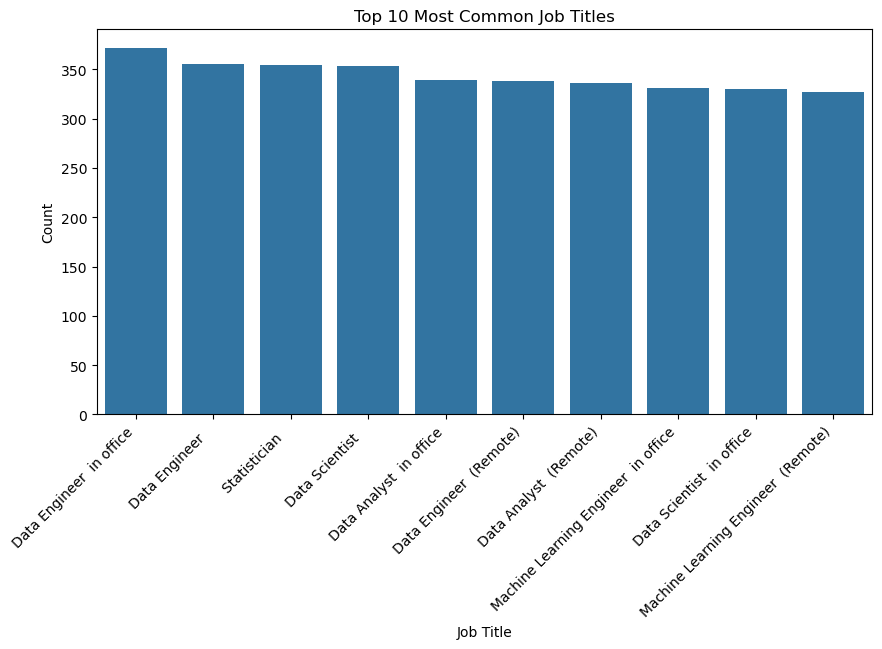

In [222]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_titles.index, y=top_titles.values)
plt.title("Top 10 Most Common Job Titles")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Job Title")
plt.ylabel("Count")

plt.savefig("../outputs/common-job-titles-barplot1.png")

plt.show()

### Average salary for top 10 titles

In [198]:
top_title_names = top_titles.index.tolist()
top_title_salary = (
    df[df["job_title"].isin(top_title_names)]
    .groupby("job_title")["salary_in_usd"]
    .mean()
    .sort_values(ascending=False)
)
top_title_salary

job_title
Machine Learning Engineer  (Remote)     119143.623853
Data Scientist  in office               116655.921212
Statistician                            116329.169492
Data Analyst  in office                 115888.595870
Data Engineer  (Remote)                 115521.384615
Data Engineer                           113867.740845
Data Scientist                          113843.560907
Machine Learning Engineer  in office    112329.800604
Data Analyst  (Remote)                  110695.747024
Data Engineer  in office                110638.118280
Name: salary_in_usd, dtype: float64

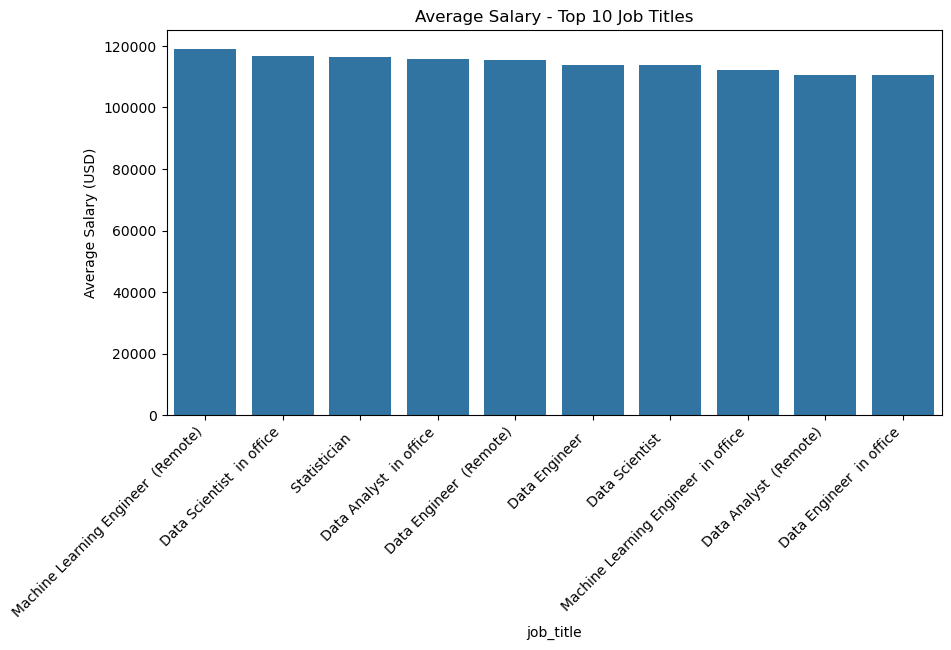

In [224]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_title_salary.index, y=top_title_salary.values)
plt.title("Average Salary - Top 10 Job Titles")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Salary (USD)")

plt.savefig("../outputs/avg-salary-top10-barplot1.png")

plt.show()